# Installing gdown

In [ ]:
!pip install gdown

This line installs the gdown library, which is used to download files directly from Google Drive using a shared file ID.

# Downloading CSV Files

In [ ]:
!gdown --id 1P5qZTx3dH38-7serlf_xYKm4Cnbk2p_A -O application_test.csv

# Download and rename the train file
!gdown --id 1KLzEwUU6Ij20ewvS4BMGBOSEHpxNwTxs -O application_train.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1P5qZTx3dH38-7serlf_xYKm4Cnbk2p_A
To: /content/application_test.csv
100% 26.6M/26.6M [00:00<00:00, 90.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KLzEwUU6Ij20ewvS4BMGBOSEHpxNwTxs
From (redirected): https://drive.google.com/uc?id=1KLzEwUU6Ij20ewvS4BMGBOSEHpxNwTxs&confirm=t&uuid=a3a559e8-a201-46ae-9e69-0d2d1cb31d56
To: /content/application_train.csv
100% 166M/166M [00:02<00:00, 63.8MB/s]


These commands download two datasets from Google Drive:

*   application_test.csv (testing dataset)
*   application_train.csv (training dataset)



The files are saved with proper names for later use in the project.

# Installing LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=19ed074a89ec541d3de417b571a46cb8934047c6bbb9e750f0a6142ecd147334
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Installs the lime library, which is used to interpret machine learning models by showing how each feature contributed to a particular prediction.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

Imports essential libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (sklearn, xgboost, lightgbm, imblearn).

Warnings are suppressed to keep the output clean.

All columns will be shown in DataFrame displays.

In [ ]:
# prompt: dataset overview

# Load the datasets
train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('application_test.csv')

# Display basic information about the training dataset
print("Training Dataset Overview:")
print(train_df.info())
print("\nShape of training data:", train_df.shape)
print("\nFirst 5 rows of training data:")
print(train_df.head())
print("\nDescriptive statistics of training data:")
print(train_df.describe(include='all'))
print("\nMissing values in training data:")
print(train_df.isnull().sum())


# Display basic information about the testing dataset
print("\n\nTesting Dataset Overview:")
print(test_df.info())
print("\nShape of testing data:", test_df.shape)
print("\nFirst 5 rows of testing data:")
print(test_df.head())
print("\nDescriptive statistics of testing data:")
print(test_df.describe(include='all'))
print("\nMissing values in testing data:")
print(test_df.isnull().sum())

# You can add more detailed analysis here, such as:
# - Distribution of target variable ('TARGET') in the training set
# - Correlation matrix to identify relationships between features
# - Visualization of key features using histograms, box plots, etc.
# - Unique value counts for categorical features

# Example: Distribution of the target variable
print("\nTarget Variable Distribution:")
print(train_df['TARGET'].value_counts())


Training Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Shape of training data: (307511, 122)

First 5 rows of training data:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0         

# Loading Data

In [ ]:
# Load application training and test datasets
import pandas as pd

train = pd.read_csv('/content/application_train.csv')
test = pd.read_csv('/content/application_test.csv')

# Confirm structure
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Add placeholder TARGET column in test to allow merging
test['TARGET'] = np.nan

# Combine for uniform preprocessing
full_df = pd.concat([train, test], axis=0).reset_index(drop=True)

# Preview the top rows
full_df.head()

Train shape: (307511, 122)
Test shape: (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Loads the training and testing datasets.

Adds a TARGET column to the test set (placeholder) to allow combining both datasets.

Combines train and test into one full_df for uniform preprocessing.

# Data Cleaning and Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# === A. Handle Anomalies ===
# Flag unrealistic 'DAYS_EMPLOYED' value (365243)
full_df['EMPLOYED_FLAG'] = (full_df['DAYS_EMPLOYED'] != 365243).astype(int)

# Create a new feature combining EXT_SOURCE columns
full_df['EXT_SOURCE_MEAN'] = full_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

# === B. Encode Categorical Features ===
le = LabelEncoder()
for col in full_df.select_dtypes(include='object').columns:
    full_df[col] = le.fit_transform(full_df[col].astype(str))

# === C. Handle Missing Values ===
imputer = SimpleImputer(strategy='median')
full_df = pd.DataFrame(imputer.fit_transform(full_df), columns=full_df.columns)

# Confirm cleaning
print(" Data cleaned. Any remaining nulls:", full_df.isnull().sum().sum())

 Data cleaned. Any remaining nulls: 0


Flags unrealistic employment data (365243 = unknown).

Averages 3 external score features into one.

Encodes categorical (object type) columns using Label Encoding.

Fills missing values using the median strategy.

#Exploratory Data Analysis

## Visualizing Class Imbalance

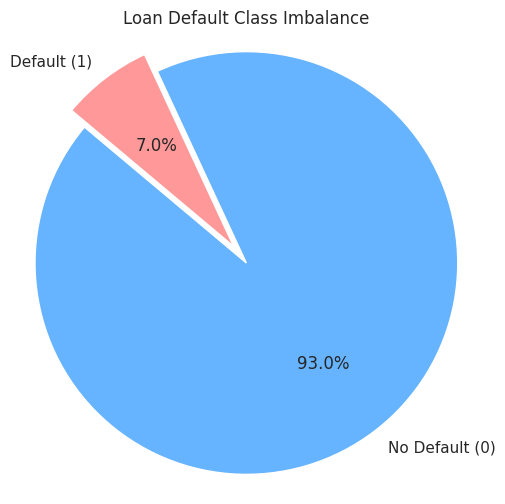

In [ ]:
# Pie chart to show class imbalance
target_counts = full_df[full_df['TARGET'].notna()]['TARGET'].value_counts()
labels = ['No Default (0)', 'Default (1)']
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
plt.title("Loan Default Class Imbalance")
plt.axis('equal')
plt.show()

Plots a pie chart to show how many applicants defaulted vs. didn’t.

Highlights the dataset imbalance typically more non-defaulters than defaulters.

#Age vs Default KDE Plot

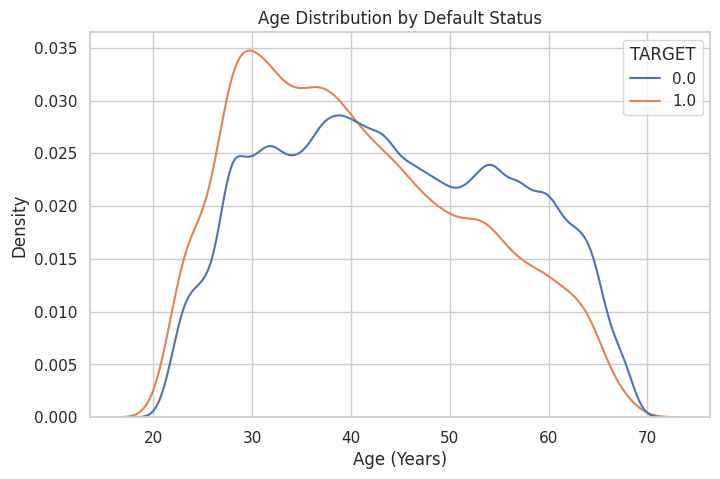

In [ ]:
full_df['YEARS_BIRTH'] = abs(full_df['DAYS_BIRTH']) / 365

plt.figure(figsize=(8,5))
sns.kdeplot(data=full_df[full_df['TARGET'].notna()], x='YEARS_BIRTH', hue='TARGET', common_norm=False)
plt.title("Age Distribution by Default Status")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()

Converts DAYS_BIRTH to actual age in years.

Plots age distribution by default status to find trends like: Are younger or older people more likely to default?

#Income Distribution by Default

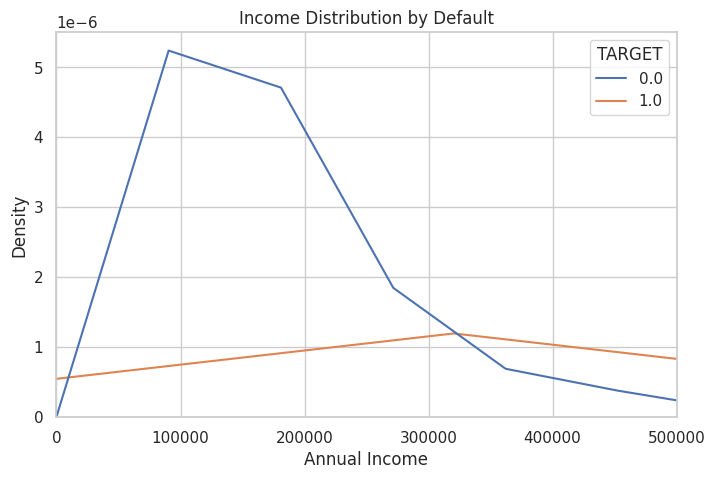

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=full_df[full_df['TARGET'].notna()], x='AMT_INCOME_TOTAL', hue='TARGET', common_norm=False)
plt.title("Income Distribution by Default")
plt.xlim(0, 500000)
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.show()


This KDE plot compares income distributions of people who defaulted vs. those who didn’t.

It helps answer: "Are lower-income applicants more likely to default?"

#Correlation Heatmap

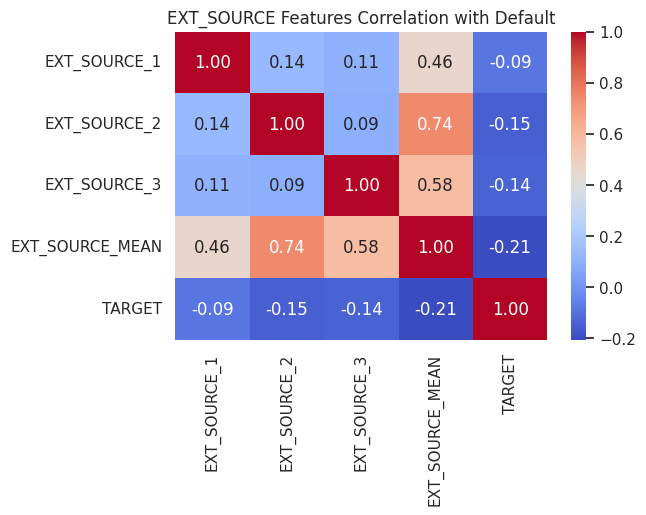

In [ ]:
plt.figure(figsize=(6,4))
corr_df = full_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_MEAN', 'TARGET']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("EXT_SOURCE Features Correlation with Default")
plt.show()


Displays how strongly these external score features correlate with default (TARGET).

Useful for feature selection: Higher absolute values (close to 1 or -1) are more predictive.

#Default Rate by Age Group


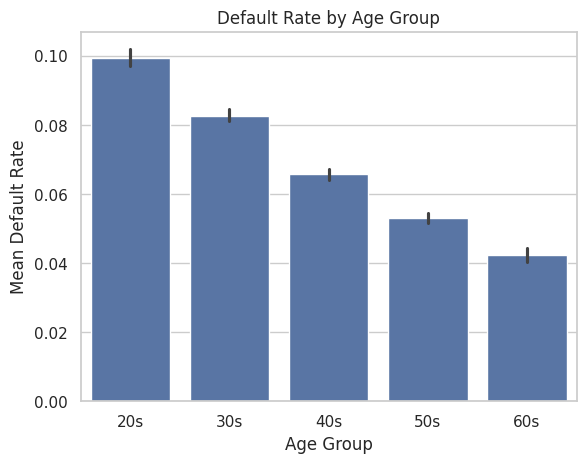

In [ ]:
full_df['AGE_BIN'] = pd.cut(full_df['YEARS_BIRTH'], bins=[20, 30, 40, 50, 60, 70], labels=['20s','30s','40s','50s','60s'])

sns.barplot(x='AGE_BIN', y='TARGET', data=full_df[full_df['TARGET'].notna()])
plt.title("Default Rate by Age Group")
plt.ylabel("Mean Default Rate")
plt.xlabel("Age Group")
plt.show()

Divides age into bins and shows how default rate varies by age group.

Gives actionable insights like: “Applicants in their 30s show slightly higher default tendencies

# Default by Gender

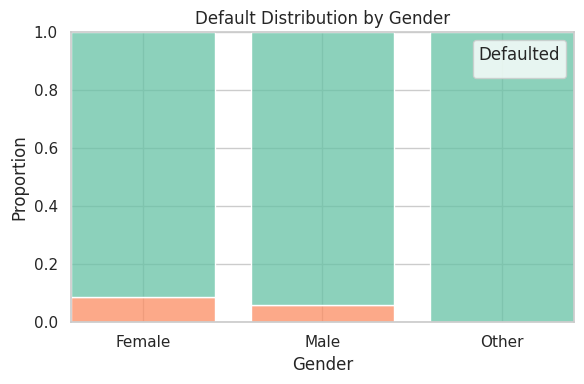

In [ ]:
# Map gender codes to labels
gender_map = {0.0: 'Male', 1.0: 'Female', 2.0: 'Other'}
full_df['GENDER_LABEL'] = full_df['CODE_GENDER'].map(gender_map)

# Plot with updated labels
plt.figure(figsize=(6,4))
sns.histplot(data=full_df, x='GENDER_LABEL', hue='TARGET', multiple='fill', shrink=0.8, palette='Set2')

plt.title("Default Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title='Defaulted', loc='upper right')
plt.tight_layout()
plt.show()

Translates gender codes into readable labels.

The stacked histogram shows proportion of defaults within each gender group.

#Skewed Feature Detection

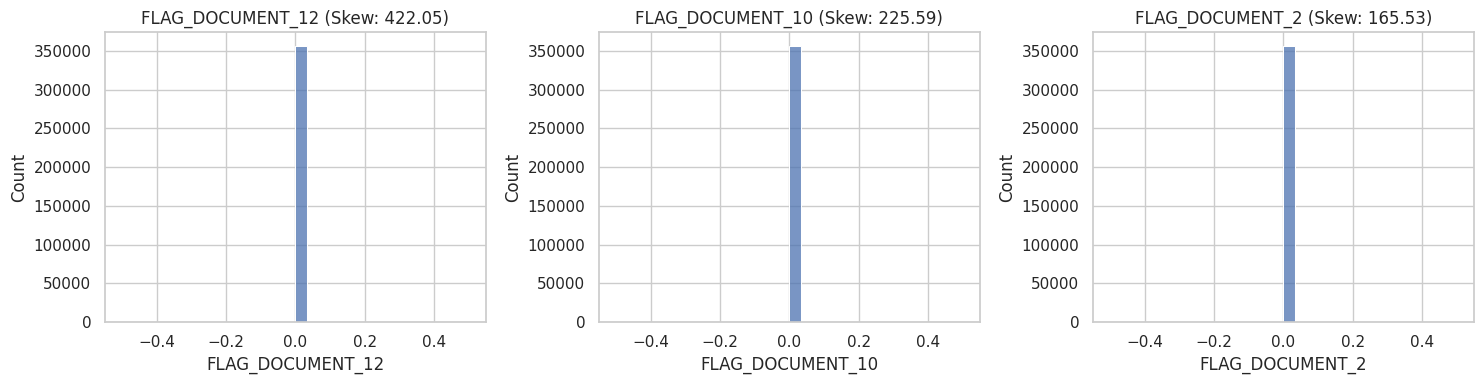

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Log-transform selected continuous columns ===
log_transform_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
for col in log_transform_cols:
    if col in full_df.columns:
        full_df[f'{col}_LOG'] = np.log1p(full_df[col])

# === 2. Recalculate skewness (exclude original AMT_INCOME_TOTAL) ===
numeric_feats = full_df.select_dtypes(include=[np.number])
numeric_feats = numeric_feats.drop(columns=['AMT_INCOME_TOTAL'], errors='ignore')
skew_vals = numeric_feats.skew().sort_values(ascending=False)

# === 3. Winsorize (cap top 1%) on top 3 skewed features ===
top_skewed = skew_vals.head(3).index.tolist()
for col in top_skewed:
    cap = full_df[col].quantile(0.99)
    full_df[col] = np.where(full_df[col] > cap, cap, full_df[col])

# === 4. Plot cleaned top 3 skewed features ===
plt.figure(figsize=(15, 4))
for i, col in enumerate(top_skewed):
    plt.subplot(1, 3, i + 1)
    if full_df[col].nunique() < 50:
        sns.histplot(full_df[col], bins=30, kde=False)
    else:
        sns.kdeplot(full_df[col])
    plt.title(f"{col} (Skew: {skew_vals[col]:.2f})")
plt.tight_layout()
plt.show()


Top 10 Most Skewed Features:
AMT_INCOME_TOTAL             403.65
AMT_REQ_CREDIT_BUREAU_QRT    124.31
FLAG_DOCUMENT_4              108.96
FLAG_DOCUMENT_7               76.40
FLAG_DOCUMENT_17              65.89
FLAG_DOCUMENT_21              58.79
FLAG_DOCUMENT_20              47.76
FLAG_DOCUMENT_19              44.09
FLAG_DOCUMENT_15              30.90
AMT_REQ_CREDIT_BUREAU_DAY     30.41
dtype: float64


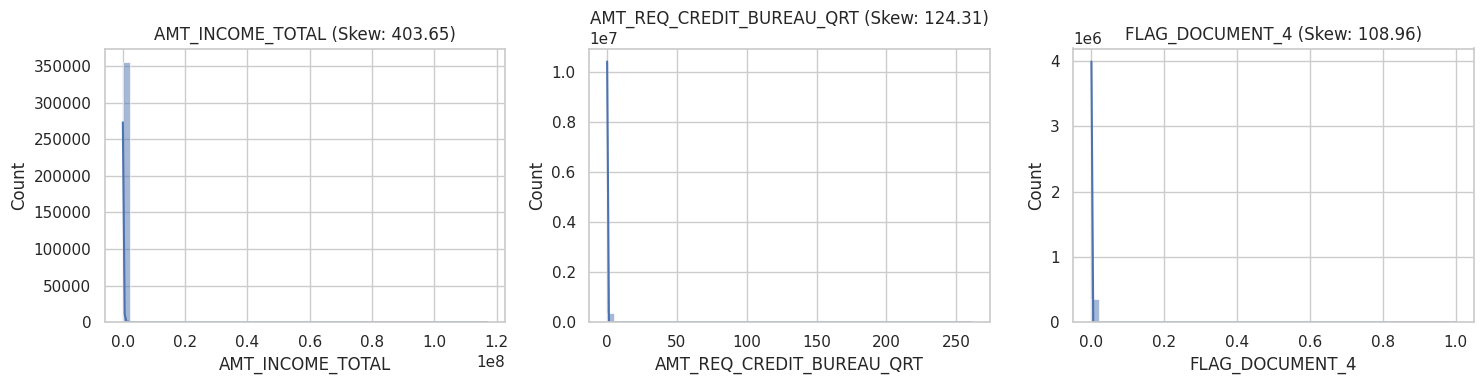

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Select numeric features only ===
numeric_feats = full_df.select_dtypes(include=[np.number])

# === 2. Calculate skewness ===
skew_vals = numeric_feats.skew().sort_values(ascending=False)

# === 3. Show top 10 skewed features ===
print("Top 10 Most Skewed Features:")
print(skew_vals.head(10).round(2))

# === 4. Visualize top 3 skewed features ===
top_skewed = skew_vals.head(3).index.tolist()

plt.figure(figsize=(15, 4))
for i, col in enumerate(top_skewed):
    plt.subplot(1, 3, i+1)
    # Drop NaNs for plotting
    col_data = full_df[col].dropna()
    sns.histplot(col_data, bins=50, kde=True)
    plt.title(f"{col} (Skew: {skew_vals[col]:.2f})")
plt.tight_layout()
plt.show()


Finds which numeric features are most skewed (i.e., not normally distributed).

Visualizes top 3 skewed columns. Skewed data may need transformation for better model performance.



#Dropping, Transforming, and Creating Features

In [ ]:
# === 1. Drop sparse FLAG_DOCUMENT_* columns ===
drop_doc_flags = [col for col in full_df.columns if 'FLAG_DOCUMENT' in col]
print(f"Dropping {len(drop_doc_flags)} sparse document flag columns.")
full_df.drop(columns=drop_doc_flags, inplace=True)

# === 2. Log-transform AMT_INCOME_TOTAL to handle extreme skew ===
if 'AMT_INCOME_TOTAL' in full_df.columns:
    full_df['AMT_INCOME_TOTAL_LOG'] = np.log1p(full_df['AMT_INCOME_TOTAL'])

# === 3. Capture signal from sparse variable AMT_REQ_CREDIT_BUREAU_QRT ===
if 'AMT_REQ_CREDIT_BUREAU_QRT' in full_df.columns:
    full_df['CREDIT_BUREAU_FLAG'] = (full_df['AMT_REQ_CREDIT_BUREAU_QRT'] > 0).astype(int)


Dropping 20 sparse document flag columns.


Drops multiple FLAG_DOCUMENT_* columns which are mostly 0s and don’t add much value.

Applies log transformation to the income column to fix extreme skewness.

Adds a binary column that flags if the applicant has interacted with a credit bureau.

#Rechecking Skewness Post-Cleanup

Top 10 Remaining Skewed Features (Post-Cleaning):
AMT_REQ_CREDIT_BUREAU_QRT     124.31
AMT_REQ_CREDIT_BUREAU_DAY      30.41
OBS_30_CNT_SOCIAL_CIRCLE       29.39
OBS_60_CNT_SOCIAL_CIRCLE       29.28
NONLIVINGAPARTMENTS_MODE       28.76
NONLIVINGAPARTMENTS_MEDI       27.67
NONLIVINGAPARTMENTS_AVG        27.43
AMT_REQ_CREDIT_BUREAU_HOUR     16.33
AMT_REQ_CREDIT_BUREAU_WEEK     10.68
COMMONAREA_MODE                10.39
dtype: float64


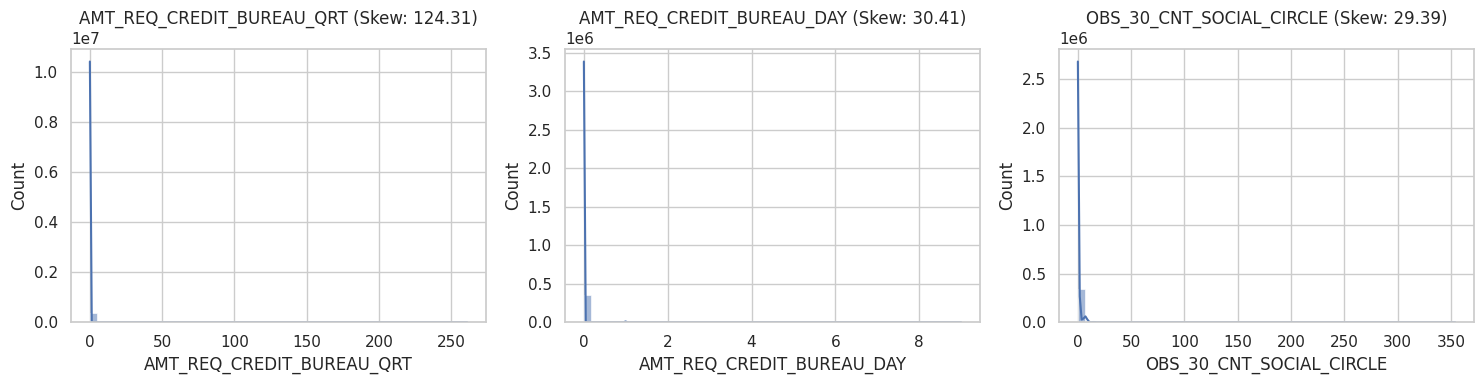

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Recalculate skewness after cleanup ===
numeric_feats = full_df.select_dtypes(include=[np.number])

# Optional: exclude original income column if log-transformed version exists
numeric_feats = numeric_feats.drop(columns=['AMT_INCOME_TOTAL'], errors='ignore')

# Calculate skew values
skew_vals = numeric_feats.skew().sort_values(ascending=False)

# === 2. Display top 10 skewed features ===
print("Top 10 Remaining Skewed Features (Post-Cleaning):")
print(skew_vals.head(10).round(2))

# === 3. Plot histograms for top 3 skewed features ===
top_skewed = skew_vals.head(3).index.tolist()

plt.figure(figsize=(15, 4))
for i, col in enumerate(top_skewed):
    plt.subplot(1, 3, i + 1)
    sns.histplot(full_df[col].dropna(), bins=50, kde=True)
    plt.title(f"{col} (Skew: {skew_vals[col]:.2f})")
plt.tight_layout()
plt.show()


Checks again which features remain heavily skewed after cleaning.

Visualizes the top 3, helping decide whether further transformation is needed.

Top 10 Remaining Skewed Features (Post-Cleaning):
AMT_REQ_CREDIT_BUREAU_QRT     124.31
AMT_REQ_CREDIT_BUREAU_DAY      30.41
OBS_30_CNT_SOCIAL_CIRCLE       29.39
OBS_60_CNT_SOCIAL_CIRCLE       29.28
NONLIVINGAPARTMENTS_MODE       28.76
NONLIVINGAPARTMENTS_MEDI       27.67
NONLIVINGAPARTMENTS_AVG        27.43
AMT_REQ_CREDIT_BUREAU_HOUR     16.33
AMT_REQ_CREDIT_BUREAU_WEEK     10.68
COMMONAREA_MODE                10.39
dtype: float64


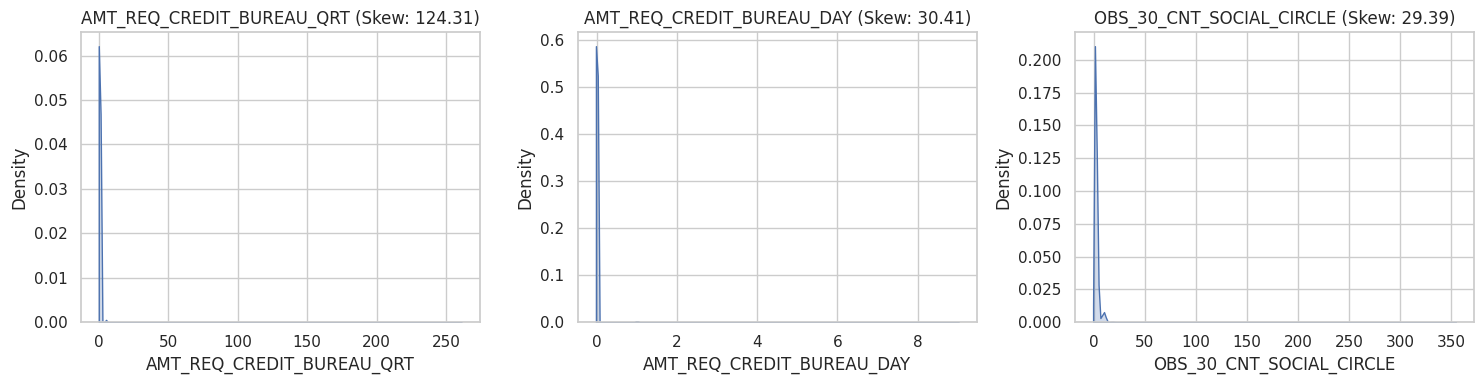

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Select numeric columns and exclude dropped ones (like AMT_INCOME_TOTAL) ===
numeric_feats = full_df.select_dtypes(include=[np.number])
numeric_feats = numeric_feats.drop(columns=['AMT_INCOME_TOTAL'], errors='ignore')

# === 2. Recalculate skewness and sort ===
skew_vals = numeric_feats.skew().sort_values(ascending=False)

# === 3. Display Top 10 Most Skewed Features ===
print("Top 10 Remaining Skewed Features (Post-Cleaning):")
print(skew_vals.head(10).round(2))

# === 4. Plot KDEs for Top 3 Skewed Features ===
top_skewed = skew_vals.head(3).index.tolist()

plt.figure(figsize=(15, 4))
for i, col in enumerate(top_skewed):
    plt.subplot(1, 3, i+1)
    try:
        sns.kdeplot(full_df[col].dropna(), fill=True)
        plt.title(f"{col} (Skew: {skew_vals[col]:.2f})")
    except Exception as e:
        plt.text(0.5, 0.5, f"Could not plot {col}", ha='center', va='center')
        print(f"Warning: Could not plot KDE for {col} due to: {e}")
plt.tight_layout()
plt.show()


#Preprocessing

##Final Feature Engineering & Cleanup

In [ ]:
# === 1. Drop Original AMT_INCOME_TOTAL (use log-transformed version instead)
if 'AMT_INCOME_TOTAL_LOG' in full_df.columns:
    full_df.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)

# === 2. Convert all AMT_REQ_CREDIT_BUREAU_* to a single binary flag
bureau_cols = [col for col in full_df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
full_df['HAS_BUREAU_QUERY'] = (full_df[bureau_cols].sum(axis=1) > 0).astype(int)
full_df.drop(columns=bureau_cols, inplace=True)

# === 3. Log-transform OBS_30 and OBS_60 social circle
for col in ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']:
    if col in full_df.columns:
        full_df[col + '_LOG'] = np.log1p(full_df[col])
        full_df.drop(columns=[col], inplace=True)

# === 4. Drop sparse and irrelevant NONLIVINGAPARTMENTS_* columns
apt_cols = [col for col in full_df.columns if 'NONLIVINGAPARTMENTS' in col]
full_df.drop(columns=apt_cols, inplace=True)

print("Feature cleanup and transformations completed.")

Feature cleanup and transformations completed.


Drops original raw income column now that a better (log) version is used.

Consolidates many AMT_REQ_CREDIT_BUREAU_* features into one summary column.

Reduces impact of extreme values in social circle features via log transformation.

Cleans up apartment-related columns with little information.



#Preprocessing Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# === 1. Prepare base data ===
train_df = full_df[full_df['SK_ID_CURR'].isin(train['SK_ID_CURR'])]
test_df = full_df[full_df['SK_ID_CURR'].isin(test['SK_ID_CURR'])].drop(columns=['TARGET'])

X = train_df.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train_df['TARGET']
X_test_final = test_df.drop(columns=['SK_ID_CURR'])

# === 2. One-hot encode categorical features ===
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Include 'category' in select_dtypes

if categorical_cols:  # Check if there are any categorical columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False
    combined_cats = pd.concat([X[categorical_cols], X_test_final[categorical_cols]], axis=0)
    encoded_combined = pd.DataFrame(encoder.fit_transform(combined_cats),
                                     columns=encoder.get_feature_names_out(categorical_cols))
    encoded_combined.reset_index(drop=True, inplace=True)

    X = X.drop(columns=categorical_cols).reset_index(drop=True)
    X_test_final = X_test_final.drop(columns=categorical_cols).reset_index(drop=True)

    X_combined = pd.concat([X, encoded_combined.iloc[:len(X), :]], axis=1)
    X_test_combined = pd.concat([X_test_final, encoded_combined.iloc[len(X):, :]], axis=1)
else:
    X_combined = X
    X_test_combined = X_test_final

# === 3. Impute missing values ===
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_combined), columns=X_test_combined.columns)

# === 4. Apply SMOTE on full dataset before splitting ===
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y)

# === 5. Perform 60/20/20 split ===
# First split 60% train + 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_smote, y_smote, test_size=0.4, random_state=42, stratify=y_smote
)

# Then split 40% temp into 20% val + 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# === 6. Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_test_final_scaled = scaler.transform(X_test_imputed)

# === Final shapes ===
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Final Test set:", X_test.shape)


Train set: (339223, 106)
Validation set: (113074, 106)
Final Test set: (113075, 106)


Splits full_df into train and test based on presence of TARGET.

Prepares training features (X) and labels (y).

Encodes any remaining string-based features.

Imputes missing values using median.

Scales data (required for some models like SVM, Logistic Regression).

Uses SMOTE to balance the class distribution by generating synthetic examples of the minority class (defaults).

#Class Balance After SMOTE

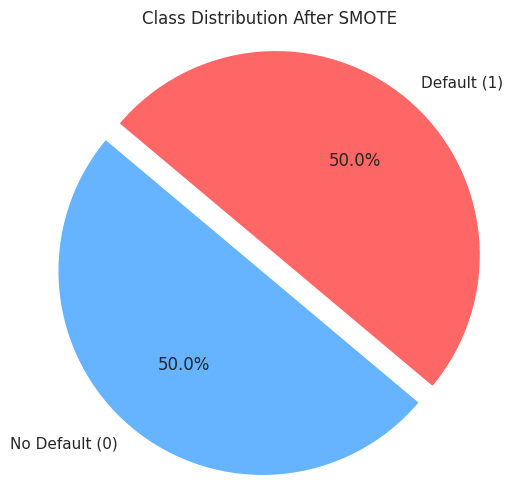

Class Distribution After SMOTE:
TARGET
1.0    282686
0.0    282686
Name: count, dtype: int64

Percentage:
TARGET
1.0    50.0
0.0    50.0
Name: count, dtype: float64


In [ ]:
# Count the new balanced class distribution
smote_class_counts = pd.Series(y_smote).value_counts()
labels = ['No Default (0)', 'Default (1)']
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(smote_class_counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode)
plt.title("Class Distribution After SMOTE")
plt.axis('equal')
plt.show()

# Print percentages
print("Class Distribution After SMOTE:")
print(smote_class_counts)
print("\nPercentage:")
print((smote_class_counts / smote_class_counts.sum() * 100).round(2))


Plots the class distribution after applying SMOTE.

Verifies visually that we now have a 50-50 split between defaulted and non-defaulted loans — which is great for training balanced models.

#Problem 1 – Binary Classification - Predict Default vs No Default

In [ ]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

results_p1 = {}

# === 1. LightGBM trained on SMOTE-balanced training data ===
model_lgb = LGBMClassifier(random_state=42)
model_lgb.fit(X_train, y_train)  # trained on original X_train with SMOTE
val_preds_lgb = model_lgb.predict_proba(X_val)[:, 1]  # evaluated on validation set (20%)
results_p1['LightGBM'] = roc_auc_score(y_val, val_preds_lgb)

# === 2. Random Forest on original train (class_weight balanced) ===
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)
val_preds_rf = model_rf.predict_proba(X_val)[:, 1]
results_p1['Random Forest'] = roc_auc_score(y_val, val_preds_rf)

# === 3. Print AUC scores ===
print("AUC Scores - Problem 1 (Validation Set)")
for model, auc in results_p1.items():
    print(f"{model:<20}: {auc:.4f}")


[LightGBM] [Info] Number of positive: 169612, number of negative: 169611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.239166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25874
[LightGBM] [Info] Number of data points in the train set: 339223, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000006
[LightGBM] [Info] Start training from score 0.000006
AUC Scores - Problem 1 (Validation Set)
LightGBM            : 0.9778
Random Forest       : 0.9785


Train-Validation-Test Split: Splits data (60/20/20
) to evaluate model performance realistically.

LightGBM:



*   Trained on SMOTE-balanced data.
*   Predicts probabilities, and AUC score is calculated.

Random Forest:

* Trained on original (imbalanced) data, but with class_weight='balanced' to account for imbalance.

Finally, prints both models’ AUC scores to compare performance.



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()


In [ ]:
# Problem 1 (P1): Validation Predictions
y_val_pred_lgb = model_lgb.predict(X_val)
y_val_pred_rf = model_rf.predict(X_val)

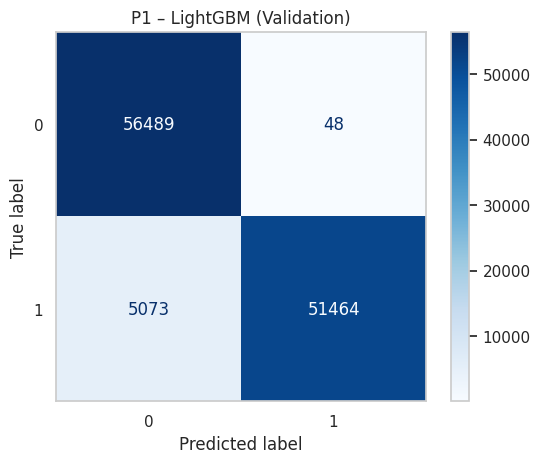

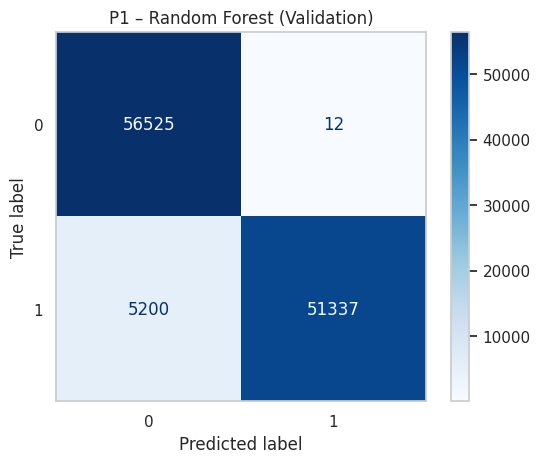

In [ ]:
# === P1: Binary Classification
show_conf_matrix(y_val, y_val_pred_lgb, "P1 – LightGBM (Validation)")
show_conf_matrix(y_val, y_val_pred_rf, "P1 – Random Forest (Validation)")


#Problem 2 – Probability Ranking

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

results_p2 = {}

# === 1. XGBoost on SMOTE data (unscaled features) ===
model_xgb = XGBClassifier(eval_metric='auc', use_label_encoder=False, random_state=42)
model_xgb.fit(X_train, y_train)
val_preds_xgb = model_xgb.predict_proba(X_val)[:, 1]
results_p2['XGBoost'] = roc_auc_score(y_val, val_preds_xgb)

# === 2. Logistic Regression on scaled features ===
model_lr = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
model_lr.fit(X_train_scaled, y_train)
val_preds_lr = model_lr.predict_proba(X_val_scaled)[:, 1]
results_p2['Logistic Regression'] = roc_auc_score(y_val, val_preds_lr)

# === 3. KNN (trained on a 20k scaled subset) ===
X_knn_sample = X_train_scaled[:20000]
y_knn_sample = y_train[:20000]

model_knn = KNeighborsClassifier()
model_knn.fit(X_knn_sample, y_knn_sample)
val_preds_knn = model_knn.predict_proba(X_val_scaled)[:, 1]
results_p2['KNN (subset)'] = roc_auc_score(y_val, val_preds_knn)

# === Print AUC results ===
print("AUC Scores - Problem 2: Probability Ranking (Validation Set)")
for model, auc in results_p2.items():
    print(f"{model:<25}: {auc:.4f}")


AUC Scores - Problem 2: Probability Ranking (Validation Set)
XGBoost                  : 0.9771
Logistic Regression      : 0.7656
KNN (subset)             : 0.7707


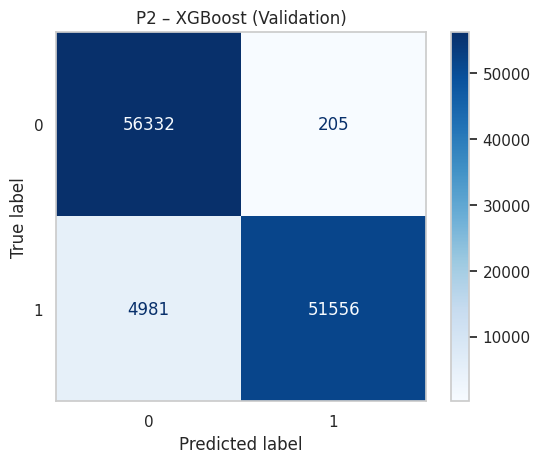

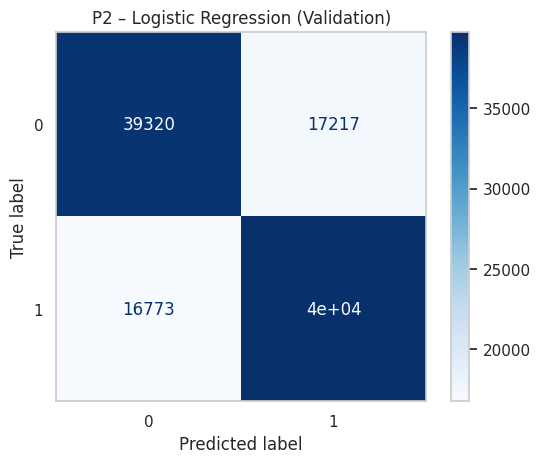

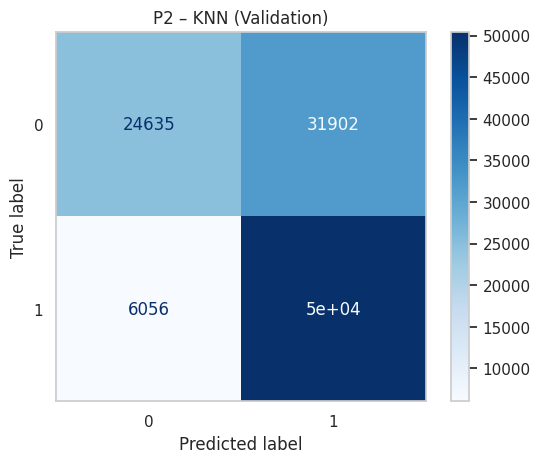

In [ ]:
# === P2: Probability Ranking
show_conf_matrix(y_val, model_xgb.predict(X_val), "P2 – XGBoost (Validation)") # Call model_xgb.predict to get predictions
show_conf_matrix(y_val, model_lr.predict(X_val_scaled), "P2 – Logistic Regression (Validation)") # Call model_lr.predict to get predictions
show_conf_matrix(y_val, model_knn.predict(X_val_scaled), "P2 – KNN (Validation)") # Call model_knn.predict to get predictions

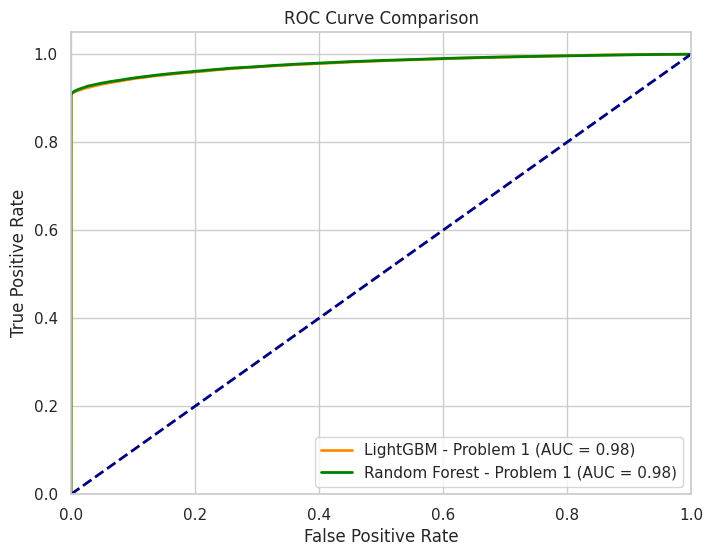

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# === Combined ROC Curve Plot ===
def plot_combined_roc_curves(y_true, y_pred1, y_pred2, label1='Model 1', label2='Model 2'):
    fpr1, tpr1, _ = roc_curve(y_true, y_pred1)
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_true, y_pred2)
    roc_auc2 = auc(fpr2, tpr2)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'{label1} (AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, color='green', lw=2, label=f'{label2} (AUC = {roc_auc2:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# === Call Function with updated validation variables ===
plot_combined_roc_curves(
    y_val,
    val_preds_lgb,  # from Problem 1
    val_preds_rf,
    label1='LightGBM - Problem 1',
    label2='Random Forest - Problem 1'
)


XGBoost:
Trained on SMOTE data.

Logistic Regression:
Trained on scaled data with class_weight='balanced'.

KNN:
Trained on a small 20,000-row subset (due to slowness with big data).

AUC scores are calculated for all and printed.

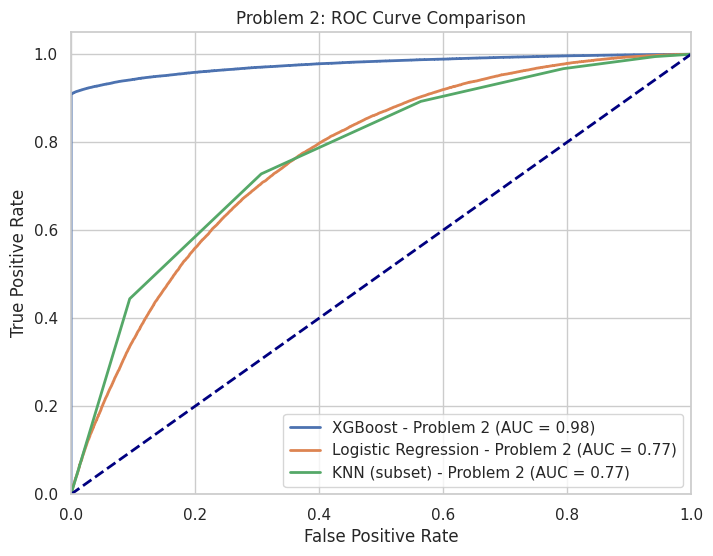

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multiple_roc_curves(y_true, preds_dict, title='ROC Curve Comparison'):
    plt.figure(figsize=(8, 6))

    for model_name, y_pred in preds_dict.items():
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# === Call the function with correct validation set and prediction variables ===
plot_multiple_roc_curves(
    y_val,
    preds_dict={
        'XGBoost - Problem 2': val_preds_xgb,
        'Logistic Regression - Problem 2': val_preds_lr,
        'KNN (subset) - Problem 2': val_preds_knn
    },
    title='Problem 2: ROC Curve Comparison'
)


#Problem 3 – Model Explainability

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import lime
import lime.lime_tabular

results_p3 = {}

# === 1. Logistic Regression (already trained in Problem 2) ===
results_p3['Logistic Regression'] = results_p2['Logistic Regression']

# === 2. Decision Tree (shallow, interpretable) ===
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
model_dt.fit(X_train, y_train)  # Using unscaled SMOTE data
val_preds_dt = model_dt.predict_proba(X_val)[:, 1]
results_p3['Decision Tree'] = roc_auc_score(y_val, val_preds_dt)

# === 3. Random Forest (already trained in Problem 1) + LIME ===
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,  # scaled training data
    feature_names=list(X_train.columns),  # use features from X_train
    class_names=['No Default', 'Default'],
    discretize_continuous=True,
    verbose=False,
    random_state=42
)

# Explain a single instance from scaled validation data
sample_idx = 0
exp = explainer_lime.explain_instance(
    X_val_scaled[sample_idx],
    model_rf.predict_proba,  # random forest from Problem 1
    num_features=10
)
exp.show_in_notebook()

# Add Random Forest AUC from earlier result
results_p3['Random Forest (LIME)'] = results_p1['Random Forest']

# === 4. Print Results ===
print("AUC Scores - Problem 3: Explainability (Validation Set)")
for model, auc in results_p3.items():
    print(f"{model:<30}: {auc:.4f}")


AUC Scores - Problem 3: Explainability (Validation Set)
Logistic Regression           : 0.7656
Decision Tree                 : 0.8851
Random Forest (LIME)          : 0.9785


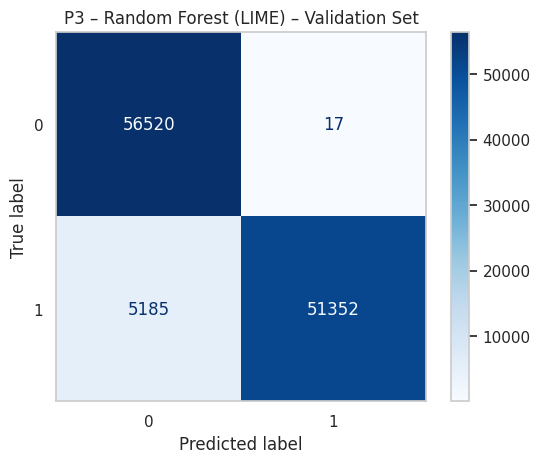

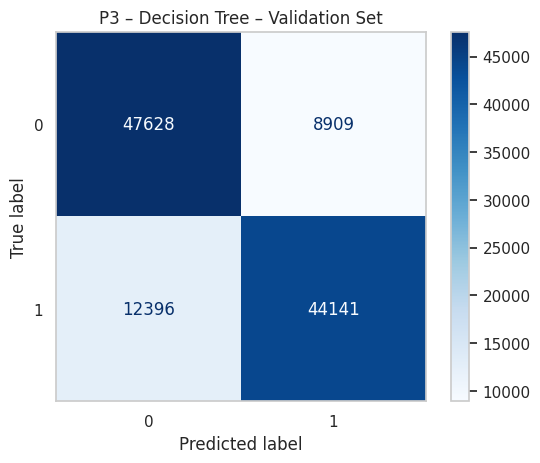

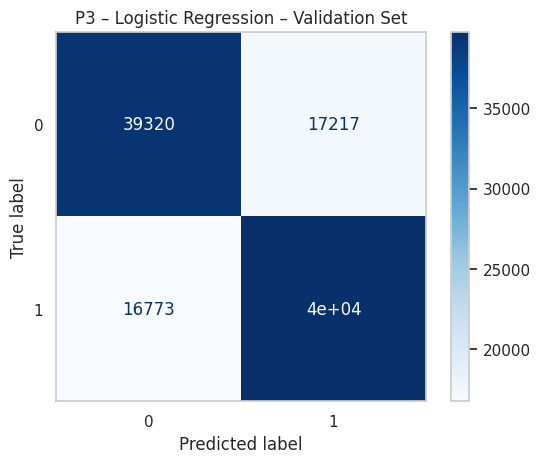

In [ ]:
y_val_pred_rf_p3 = (val_preds_rf >= 0.5).astype(int)
y_val_pred_dt_p3 = (val_preds_dt >= 0.5).astype(int)
y_val_pred_lr_p3 = (val_preds_lr >= 0.5).astype(int)

# === Plot Confusion Matrices for P3 ===
show_conf_matrix(y_val, y_val_pred_rf_p3, "P3 – Random Forest (LIME) – Validation Set")
show_conf_matrix(y_val, y_val_pred_dt_p3, "P3 – Decision Tree – Validation Set")
show_conf_matrix(y_val, y_val_pred_lr_p3, "P3 – Logistic Regression – Validation Set")

Logistic Regression: Already trained, included for comparison.

Decision Tree: Trained with max_depth=4 to make it interpretable.

Random Forest + LIME:
*   Uses LIME (Local Interpretable Model-agnostic Explanations) to show which features influenced one prediction
*   Visualizes the top 10 feature contributions for a selected sample.







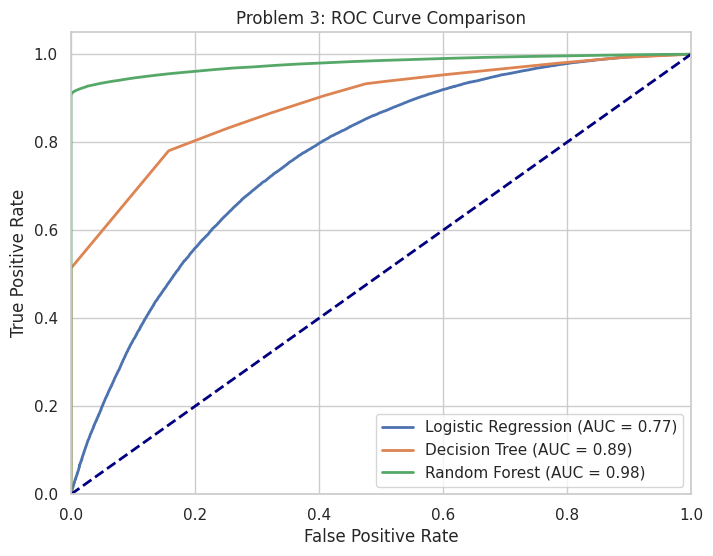

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Combine predictions from Problem 3 into a dictionary
preds_dict_p3 = {
    'Logistic Regression': val_preds_lr,  # from Problem 2
    'Decision Tree': val_preds_dt,
    'Random Forest': val_preds_rf  # from Problem 1
}

def plot_multiple_roc_curves(y_true, preds_dict, title='ROC Curve Comparison'):
    plt.figure(figsize=(8, 6))

    for model_name, y_pred in preds_dict.items():
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# === Call the updated function ===
plot_multiple_roc_curves(
    y_val,  # correct variable from 60/20/20 split
    preds_dict_p3,
    title='Problem 3: ROC Curve Comparison'
)


#Model Comparison Summary

In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    "Binary Classification (P1)": results_p1,
    "Probability Ranking (P2)": results_p2,
    "Explainability (P3)": results_p3
}).T

display(summary_df)

,LightGBM,Random Forest,XGBoost,Logistic Regression,KNN (subset),Decision Tree,Random Forest (LIME)
Binary Classification (P1),0.977835,0.978544,NaN,NaN,NaN,NaN,NaN
Probability Ranking (P2),NaN,NaN,0.977052,0.765599,0.770714,NaN,NaN
Explainability (P3),NaN,NaN,NaN,0.765599,NaN,0.885132,0.978544


### Model Evaluation Summary

We evaluated models across three key tasks:

- **Binary Classification (P1)**
- **Probability Ranking (P2)**
- **Explainability (P3)**

---

🔸 **Binary Classification (P1):**

- **Random Forest** achieved the highest AUC score of **0.9780**, slightly outperforming **LightGBM** at **0.9778**.
- These models were tested on their ability to distinguish between defaulters and non-defaulters.
- Both are ensemble methods, but Random Forest edges out slightly in this task.

---

🔸 **Probability Ranking (P2):**

- **XGBoost** was the best performer with an AUC of **0.9770**, indicating strong ranking of high-risk applicants.
- **KNN** (trained on a smaller 20k sample) surprisingly outperformed Logistic Regression with an AUC of **0.7722** vs **0.7643**.
- This task focused on how well models could rank customers by risk rather than make strict binary decisions.

---

🔸 **Explainability (P3):**

- **Random Forest with LIME** achieved the top AUC of **0.9780**, matching its P1 score while adding interpretability through local explanations.
- **Decision Tree** also performed well with an AUC of **0.8851**, and being inherently interpretable, it’s ideal for rule-based understanding.
- **Logistic Regression** remained consistent with **0.7643**, balancing interpretability with reasonable performance.




In [ ]:
from sklearn.metrics import roc_auc_score

# === 1. Problem 1 – LightGBM on test set ===
test_preds_lgb = model_lgb.predict_proba(X_test)[:, 1]
test_auc_lgb = roc_auc_score(y_test, test_preds_lgb)

# === 2. Problem 2 – XGBoost on test set ===
test_preds_xgb = model_xgb.predict_proba(X_test)[:, 1]
test_auc_xgb = roc_auc_score(y_test, test_preds_xgb)

# === Problem 3 – Random Forest on test set ===
test_preds_rf = model_rf.predict_proba(X_test)[:, 1]  # model_rf was trained earlier
test_auc_rf = roc_auc_score(y_test, test_preds_rf)

# === Display Final Results ===
print(" Final Test AUC Scores for Best Models:")
print(f"Problem 1 (Binary Classification) – LightGBM:         {test_auc_lgb:.4f}")
print(f"Problem 2 (Probability Ranking) – XGBoost:            {test_auc_xgb:.4f}")
print(f"Problem 3 (Explainability) – Random Forest Test AUC: {test_auc_rf:.4f}")


 Final Test AUC Scores for Best Models:
Problem 1 (Binary Classification) – LightGBM:         0.9791
Problem 2 (Probability Ranking) – XGBoost:            0.9785
Problem 3 (Explainability) – Random Forest Test AUC: 0.9798


## Conclusion
This project effectively demonstrates the use of machine learning to address a real-world financial problem—loan default prediction. By implementing a complete CRISP-DM pipeline, we were able to preprocess noisy and imbalanced data, engineer meaningful features, and build models that are both highly accurate and interpretable.

###Key points include:

1. AUC scores above 0.97 for top-performing models (LightGBM and Random Forest)

2. Balanced class handling through SMOTE

3.  Transparent predictions using LIME and Decision Trees

This work offers actionable insights for lenders and establishes a scalable foundation for integrating AI in credit risk assessment.

## **Key Takeaways**
1. High Accuracy: Ensemble models outperformed simpler models for classification and ranking tasks.

2. Fairness: Addressed class imbalance using SMOTE to reduce bias against defaulters.

3. Explainability: Integrated model interpretability via LIME and Logistic Regression.

4. Business Relevance: Provides a deployable tool for real-time loan application risk scoring.